In [70]:
import numpy as np
import modred as mr
import os
import matplotlib
matplotlib.use('TkAgg')  # Specify the backend
import matplotlib.pyplot as plt
from matplotlib import cm

import POD
import importlib
importlib.reload(POD)


<module 'POD' from '/home/julielimonet/Documents/Stage_M2/code/POD.py'>

In [19]:
current_directory = os.getcwd()
# print(f"\n current directory : {current_directory}\n")

# --> Load 3D (t,x,y) data in python arrays format
bulk = np.load("/home/julielimonet/Documents/Stage_M2/data/bulk.npz")
time = bulk["time"]
x = bulk["x"]
z = bulk["z"]
u = bulk["u"]
w = bulk["w"]
T = bulk["T"]

In [20]:
umean = np.mean(u, axis=0)
u = u - umean
U = np.reshape(u, (m, h * l))

In [81]:



h, l = np.shape(x)
m = len(time)

# reshape



# print(np.shape(x))
# print(np.shape(x), np.shape(time))
# U = np.reshape(u, (6249, 81*51))
# print(np.shape(U))
# print(np.array_equal(np.reshape(U, (6249,81,51)), u))

# Compute POD
num_modes = 100
POD = mr.compute_POD_arrays_snaps_method(np.swapaxes(U,0,1), list(mr.range(num_modes)), atol = 0)
modes = POD.modes
eigvals = POD.eigvals

print(np.shape(modes))
print(np.shape(eigvals))
print(h*l)
KE_mode = []
for i in range(20):
    TKE = np.sum(eigvals)
    KE_mode.append(eigvals[i]/TKE)

POD_modes = []
[POD_modes.append([]) for i in range(num_modes)]
for i in range(num_modes):
  POD_modes[i] = modes[:,i]
  POD_modes[i] = POD_modes[i].reshape((h,l)) 

(4131, 100)
(3947,)
4131


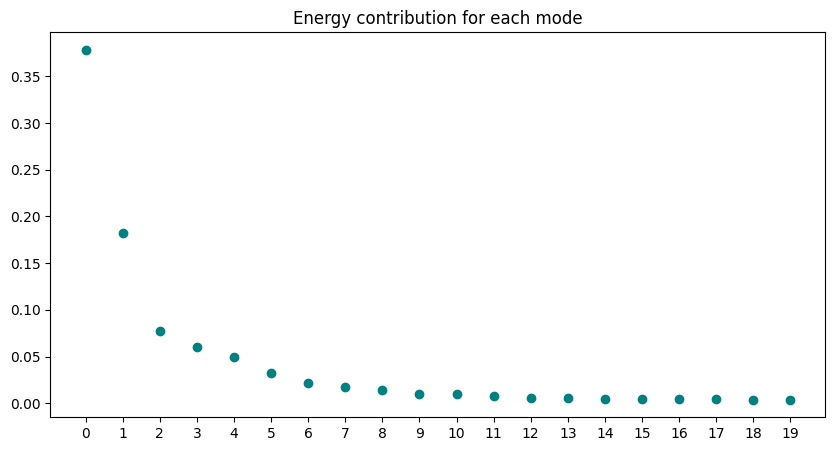

In [36]:
%matplotlib inline
N = np.arange(0, len(KE_mode), step = 1)
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(N, KE_mode, c = 'teal')
ax.set_xticks(N)
ax.set_title(f'Energy contribution for each mode')
plt.show()

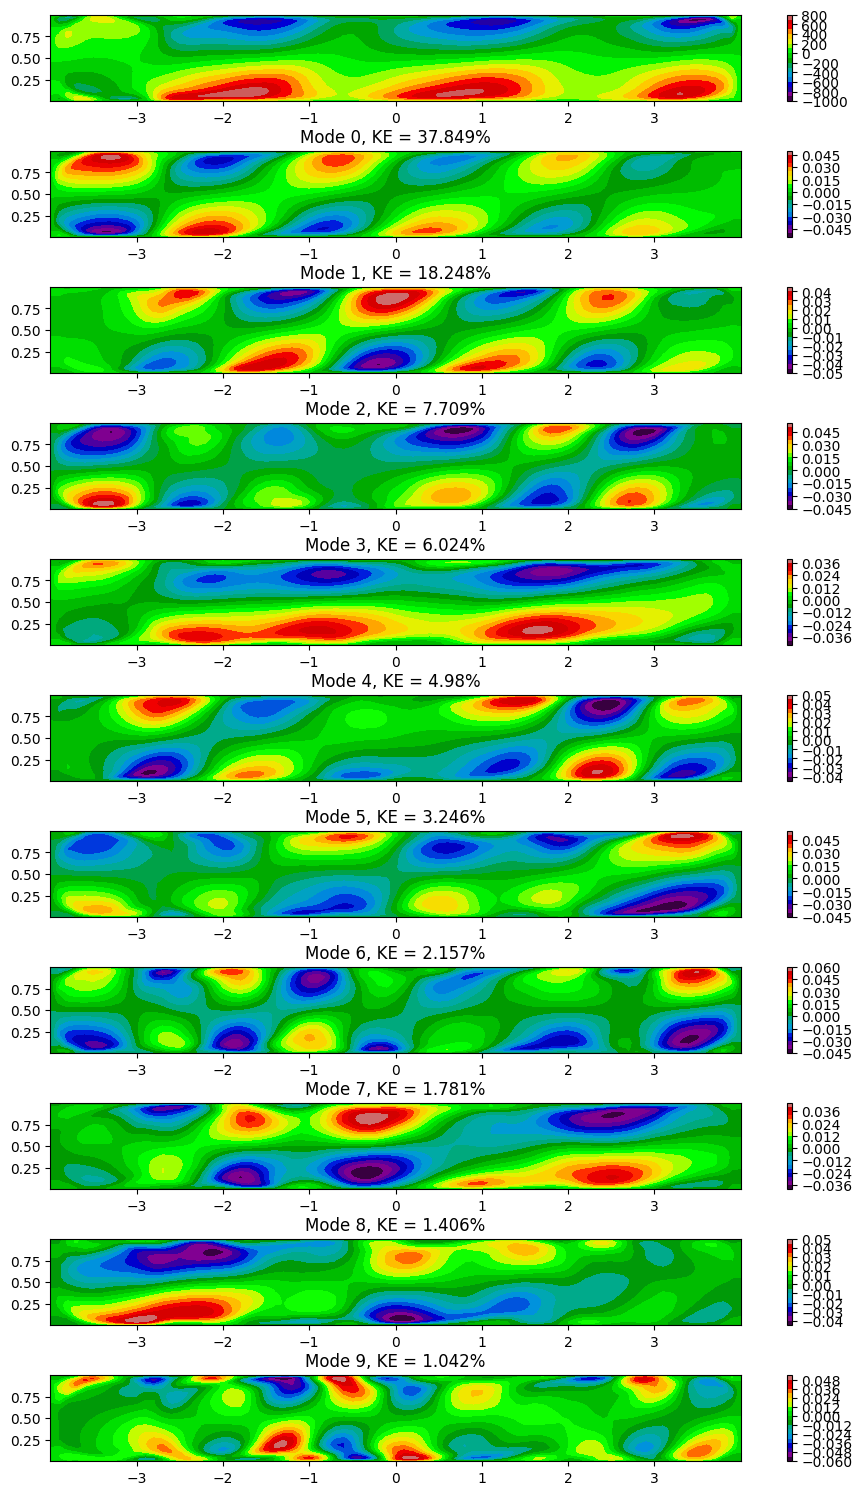

In [37]:
# --> plot results
num_modes = 10
fig, ax = plt.subplots(figsize=(10,1.5*num_modes),nrows=num_modes+1)
cf0 = ax[0].contourf(x, z, umean, levels=20, cmap=cm.nipy_spectral)
plt.colorbar(cf0)
for j in range(num_modes):
  cf0 = ax[j+1].contourf(x, z, POD_modes[j], levels=20, cmap=cm.nipy_spectral)
  plt.colorbar(cf0)
[ax[j].set_aspect('equal', 'box') for j in range(num_modes+1)]
[ax[j+1].set_title(f'Mode {j}, KE = {np.round(KE_mode[j]*100, 3)}%') for j in range(num_modes)]
plt.tight_layout()
plt.show()
# plt.savefig('pod_modes.png',dpi=300)
# plt.close()

In [72]:
from POD import POD
wmean = np.mean(w, axis=0)
w = w - wmean

h, l = np.shape(x)
m = len(time)

# reshape
W = np.reshape(w, (m, h * l))

POD_modes_w , KE_mode_w, modes_w, eigvals_w, proj_coef_w = POD(W, h, l, 100)
POD_modes_u , KE_mode_u, modes_u, eigvals_u, proj_coef_u = POD(U, h, l, 100)


In [31]:
print(np.shape(POD_modes_u))

(100, 81, 51)


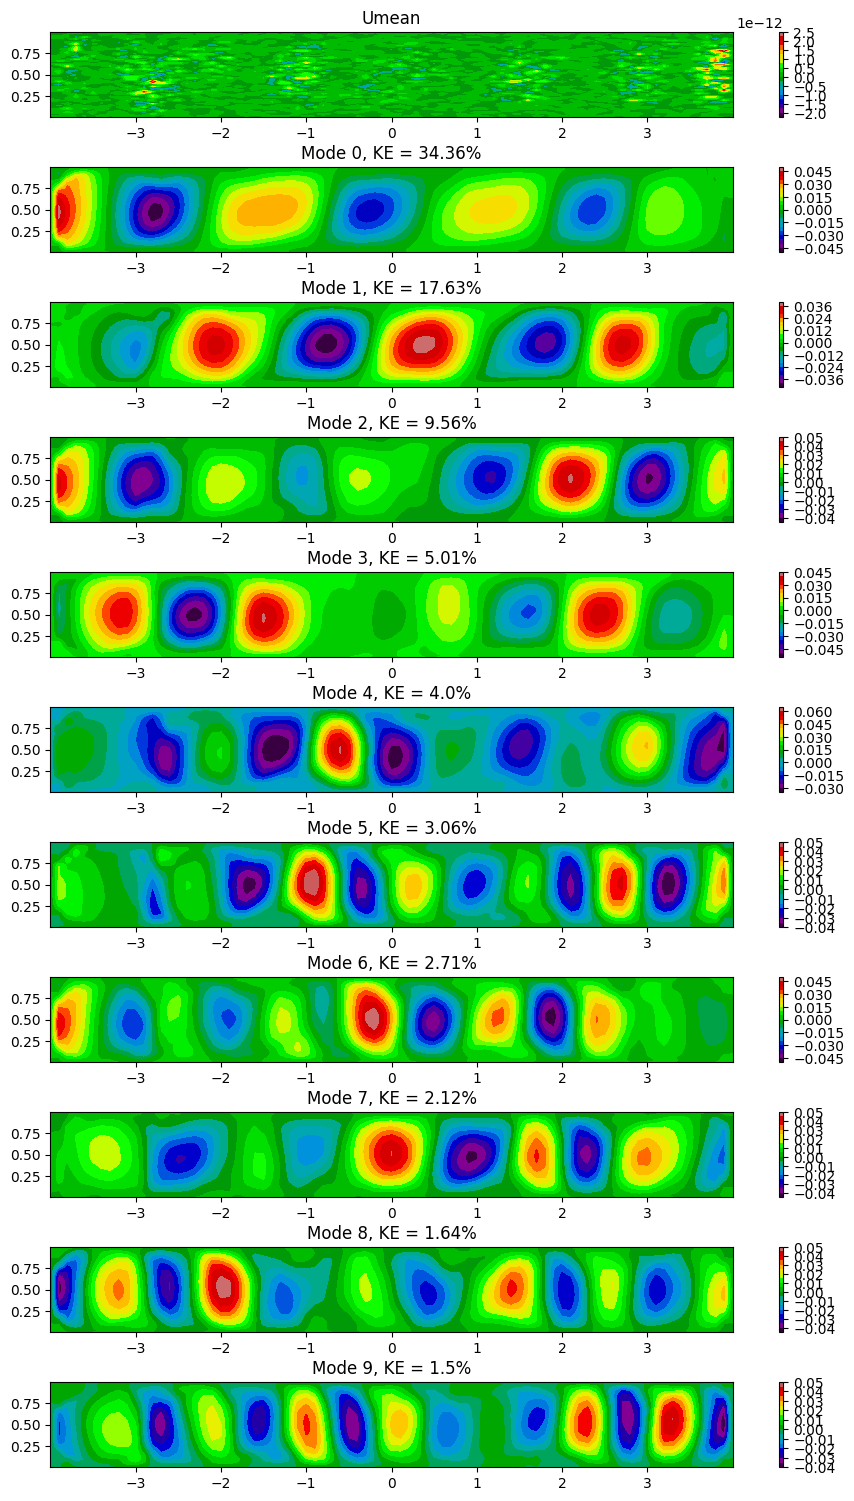

In [48]:
# --> plot results
num_modes = 10
fig, ax = plt.subplots(figsize=(10,1.5*num_modes),nrows=num_modes+1)
cf0 = ax[0].contourf(x, z, wmean, levels=20, cmap=cm.nipy_spectral)
plt.colorbar(cf0)
ax[0].set_title('Umean')

for j in range(num_modes):
  cf0 = ax[j+1].contourf(x, z, POD_modes_w[j], levels=20, cmap=cm.nipy_spectral)
  plt.colorbar(cf0)
[ax[j].set_aspect('equal', 'box') for j in range(num_modes+1)]
[ax[j+1].set_title(f'Mode {j}, KE = {np.round(KE_mode_w[j], 2)}%') for j in range(num_modes)]
plt.tight_layout()
plt.show()
# plt.savefig('pod_modes_first_w.png',dpi=300)
# plt.close()

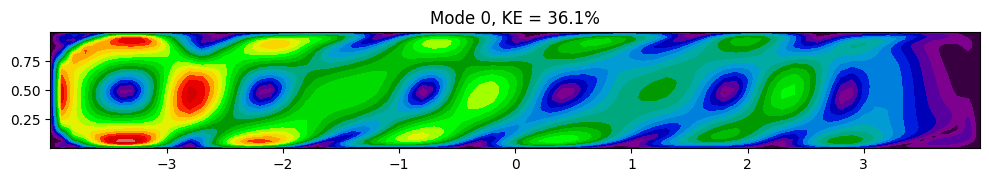

In [56]:
j = 0
fig, ax = plt.subplots(figsize=(10,15))
cf0 = ax.contourf(x, z, np.sqrt(POD_modes_u[j]**2 + POD_modes_w[j]**2), levels=20, cmap=cm.nipy_spectral)
# plt.colorbar(cf0)
ax.set_aspect('equal', 'box')
ax.set_title(f'Mode {j}, KE = {np.round((KE_mode_w[j]+KE_mode_u[j])/2, 2)}%')
plt.tight_layout()
plt.show()
# plt.savefig('pod_modes_first_w.png',dpi=300)
# plt.close()

In [82]:
print(np.shape(POD_modes_u))
print(81*51)

(100, 81, 51)
4131


In [73]:
j = 0
fig, ax = plt.subplots(figsize=(10,15))
cf0 = ax.contourf(x, z, np.sqrt(POD_modes_u[j]**2 + POD_modes_w[j]**2), levels=20, cmap=cm.nipy_spectral)
# plt.colorbar(cf0)
ax.quiver(x, z, proj_coef_u[:,j], proj_coef_w[:,j])
ax.set_aspect('equal', 'box')
ax.set_title(f'Mode {j}, KE = {np.round((KE_mode_w[j]+KE_mode_u[j])/2, 2)}%')
plt.tight_layout()
plt.show()
# plt.savefig('pod_modes_first_w.png',dpi=300)
# plt.close()

ValueError: Argument U has a size 3947 which does not match 4131, the number of arrow positions